In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot 
import seaborn as sns

from pprint import pprint
import plotly.graph_objs as go
from plotly.offline import iplot
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler

In [3]:
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
#Set seed
from numpy.random import seed
seed(7)

In [5]:
#Import dataset, split the first 4000 rows into train_df
raw_df = pd.read_csv("winequality-white.csv",  sep = ';')
train_df = raw_df.iloc[:4000]
train_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
#Write to csv
train_df.to_csv('train_dataset.csv', index = False)

In [9]:
#split the 4000-4899 into validation_df
validation_df = raw_df.iloc[4000:4899]
validation_df.to_csv('validation_dataset.csv', index = False)
validation_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4000,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6
4001,6.4,0.25,0.57,1.0,0.062,21.0,122.0,0.99238,3.00,0.40,9.5,5
4002,6.1,0.25,0.48,15.8,0.052,25.0,94.0,0.99782,3.07,0.45,9.2,6
4003,6.8,0.14,0.35,1.5,0.047,40.0,117.0,0.99111,3.07,0.72,11.1,6
4004,6.5,0.38,0.26,5.2,0.042,33.0,112.0,0.99067,3.06,0.50,12.3,7


In [8]:
training_df = pd.read_csv("train_dataset.csv")
training_df.shape

(4000, 12)

In [10]:
quality_score_df = training_df['quality'].value_counts().rename_axis('quality score').reset_index(name='counts')
quality_score_df

,quality score,counts
0,6,1717
1,5,1214
2,7,747
3,8,156
4,4,142
5,3,19
6,9,5


Text(0.5, 1.0, 'White Wine Quality Ratings')

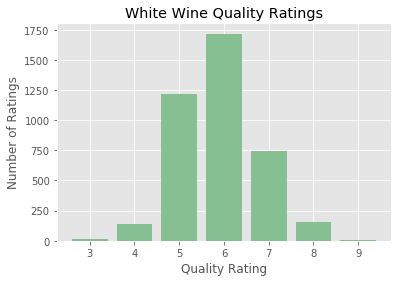

In [11]:
plt.style.use('ggplot')
plt.bar(quality_score_df['quality score'], quality_score_df['counts'], color='#86bf91')
plt.xlabel("Quality Rating")
plt.ylabel("Number of Ratings")
plt.title("White Wine Quality Ratings")

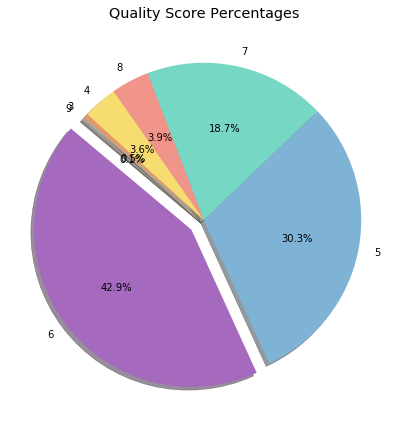

In [12]:
labels = quality_score_df['quality score'].to_list()
sizes = quality_score_df['counts'].to_list()
colors = ['#A569BD', '#7FB3D5', '#76D7C4', '#F1948A', '#F7DC6F', '#E59866', '#AAB7B8']
explode = (0.1, 0, 0, 0, 0, 0, 0)
fig, ax1 = plt.subplots(figsize = (12, 6)) 
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Quality Score Percentages")
plt.tight_layout()
plt.show()

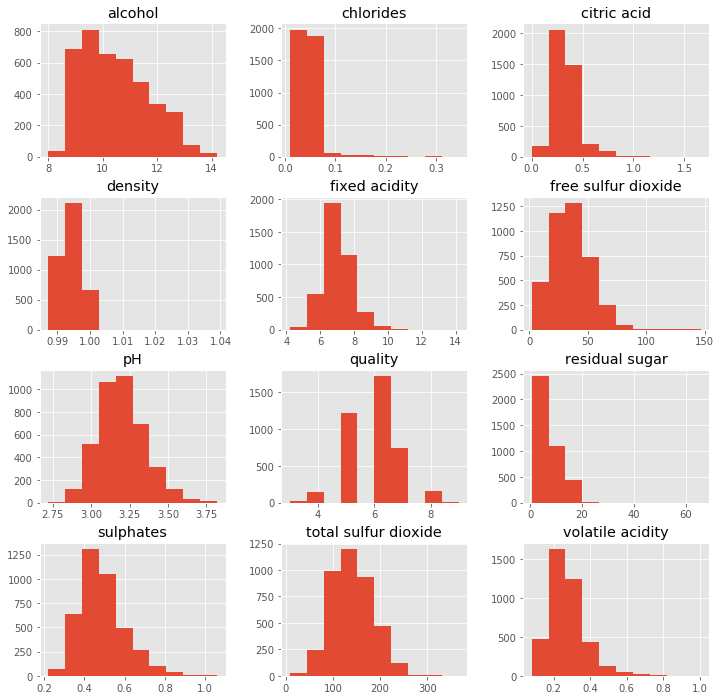

In [13]:
# Histogram distribution 

train_df.hist(bins=10,figsize=(12, 12))
plt.show()

In [63]:
#maybe we can say a rating >= 7 is considered a good wine?
#1-4 =>1, 5-7 =>2,  8,9 =>3
reviews = []
for i in training_df['quality']:
    if i >= 1 and i < 5:
        reviews.append('1')
    elif i >= 5 and i <= 7:
        reviews.append('2')
    elif i > 7 and i <= 9:
        reviews.append('3')
training_df['Reviews'] = reviews

In [64]:
training_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

In [65]:
X = training_df.drop(["quality","Reviews"], axis=1)
y = training_df["Reviews"]
print(X.shape, y.shape)

(4000, 11) (4000,)


In [66]:
# Conduct PCA this time
#scale the data using StandardScalar for PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [67]:
# Principle Component Analysis

from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

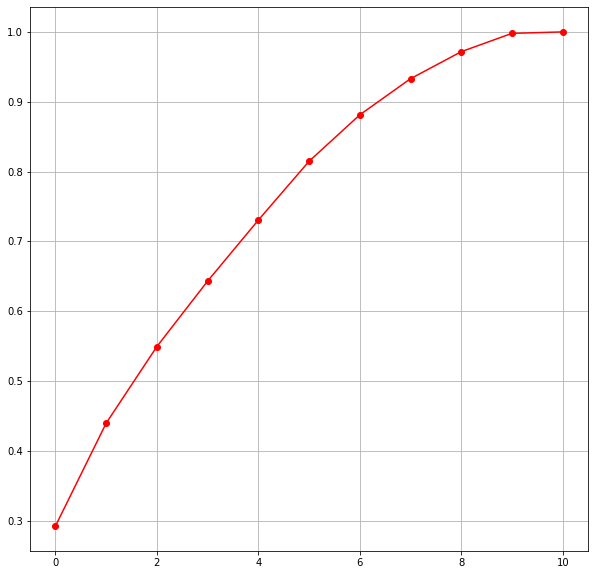

In [68]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [69]:
#AS per the graph, we can see that 8 principal components attribute for 95% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [70]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [71]:
# Train the dataset with the following algorithm
# 1. Desicision Tree, 2. Rf, 3. Naive Bayes, 4. XGB

# Machine Learning Model1 Descision Tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
model1 = clf.fit(x_train, y_train)

#model1.score(X_test, y_test)
y_pred1 = model1.predict(x_test)
report1 = classification_report(y_test, y_pred1)
print(report1)


              precision    recall  f1-score   support

           1       0.26      0.22      0.24        41
           2       0.94      0.94      0.94       916
           3       0.40      0.44      0.42        43

    accuracy                           0.89      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.89      0.89      0.89      1000



In [90]:
print(f"DT Training Data Score: {model1.score(x_train, y_train)}")
print(f"DT Testing Data Score: {model1.score(x_test, y_test)}")

DT Training Data Score: 1.0
DT Testing Data Score: 0.89


In [101]:
#Model2 Rf
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
model2 = rf.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

report2 = classification_report(y_test, y_pred2)
print(report2)

              precision    recall  f1-score   support

           1       0.67      0.10      0.17        41
           2       0.93      1.00      0.96       916
           3       1.00      0.30      0.46        43

    accuracy                           0.93      1000
   macro avg       0.87      0.47      0.53      1000
weighted avg       0.92      0.93      0.91      1000



In [73]:
print(f"RF Training Data Score: {model2.score(x_train, y_train)}")
print(f"RF Testing Data Score: {model2.score(x_test, y_test)}")

RF Training Data Score: 1.0
RF Testing Data Score: 0.929


In [74]:
#Model3 Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model3 = nb.fit(x_train,y_train)

#y_pred3 = model3.predict(x_test)


In [75]:
print(f"NB Training Data Score: {model3.score(x_train, y_train)}")
print(f"NB Testing Data Score: {model3.score(x_test, y_test)}")

NB Training Data Score: 0.899
NB Testing Data Score: 0.898


In [77]:
# Machine Learning Model4 AdaBoost
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model4 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=200, learning_rate=0.8)
model4 = model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           1       0.21      0.17      0.19        41
           2       0.94      0.94      0.94       916
           3       0.39      0.40      0.39        43

    accuracy                           0.89      1000
   macro avg       0.51      0.50      0.51      1000
weighted avg       0.88      0.89      0.89      1000



In [78]:
print(f"AdaBoost Training Data Score: {model4.score(x_train, y_train)}")
print(f"AdaBoost Testing Data Score: {model4.score(x_test, y_test)}")

AdaBoost Training Data Score: 1.0
AdaBoost Testing Data Score: 0.888


In [79]:
# Machine Learning Model5 Gradient Boost
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

model5 = GradientBoostingClassifier(random_state=7)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           1       0.38      0.07      0.12        41
           2       0.92      0.99      0.96       916
           3       0.64      0.16      0.26        43

    accuracy                           0.92      1000
   macro avg       0.65      0.41      0.45      1000
weighted avg       0.89      0.92      0.89      1000



In [80]:
print(f"GB Training Data Score: {model5.score(x_train, y_train)}")
print(f"GB Testing Data Score: {model5.score(x_test, y_test)}")

GB Training Data Score: 0.9576666666666667
GB Testing Data Score: 0.917


In [81]:
# Machine Learning Model6 xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model6 = XGBClassifier(n_estimators = 20,
                       max_depth = 10,
                       subsample = 1,
                       colsample_bytree = 0.8,
                       gamma = 1)
model6 = model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           1       0.50      0.07      0.13        41
           2       0.93      0.99      0.96       916
           3       0.85      0.26      0.39        43

    accuracy                           0.93      1000
   macro avg       0.76      0.44      0.49      1000
weighted avg       0.91      0.93      0.90      1000



In [82]:
print(f"XGB Training Data Score: {model6.score(x_train, y_train)}")
print(f"XGB Testing Data Score: {model6.score(x_test, y_test)}")

XGB Training Data Score: 0.982
XGB Testing Data Score: 0.925


In [84]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [7, 10, 20],
              'colsample_bytree' :[0.2, 0.6, 0.8],
              'gamma': [1, 2]}
grid = GridSearchCV(model6, param_grid, cv=3)

In [86]:
grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=1, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=10,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()', n_estimators=20,
                                     n_jobs=0, num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                                     tree_method='exact',

In [87]:
print(grid.best_params_)

{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 20}


In [88]:
#XGBoost with Hyperparameter Tuning
model7 = XGBClassifier(n_estimators = 20,
                       max_depth = 20,
                       subsample = 1,
                       colsample_bytree = 0.6,
                       gamma = 1)
model7 = model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           1       0.75      0.07      0.13        41
           2       0.93      1.00      0.96       916
           3       1.00      0.23      0.38        43

    accuracy                           0.93      1000
   macro avg       0.89      0.43      0.49      1000
weighted avg       0.92      0.93      0.90      1000



In [89]:
print(f"XGB_tuning Training Data Score: {model7.score(x_train, y_train)}")
print(f"XGB_tuning Testing Data Score: {model7.score(x_test, y_test)}")

XGB_tuning Training Data Score: 0.985
XGB_tuning Testing Data Score: 0.928


In [ ]:
#Rf Testing Data Score: 0.929
#XGB_tuning Testing Data Score: 0.928

In [33]:


validation_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [91]:
#Category the "Quality" into 3 categories
#1-4 =>1, 5-7 =>2, 8,9 =>3


reviews = []
for i in validation_df['quality']:
    if i >= 1 and i < 5:
        reviews.append('1')
    elif i >= 5 and i <= 7:
        reviews.append('2')
    elif i > 7 and i <= 9:
        reviews.append('3')
validation_df['Reviews'] = reviews


/Users/eileen/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [92]:
validation_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
4000,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,2
4001,6.4,0.25,0.57,1.0,0.062,21.0,122.0,0.99238,3.00,0.40,9.5,5,2
4002,6.1,0.25,0.48,15.8,0.052,25.0,94.0,0.99782,3.07,0.45,9.2,6,2
4003,6.8,0.14,0.35,1.5,0.047,40.0,117.0,0.99111,3.07,0.72,11.1,6,2
4004,6.5,0.38,0.26,5.2,0.042,33.0,112.0,0.99067,3.06,0.50,12.3,7,2


In [93]:
actual_quality = validation_df['Reviews']
actual_quality

4000    2
4001    2
4002    2
4003    2
4004    2
       ..
4893    2
4894    2
4895    2
4896    2
4897    2
Name: Reviews, Length: 898, dtype: object

In [94]:
#Prepare the validation_X
validation_X = validation_df.drop(["quality","Reviews"], axis=1)


In [96]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
validation_x = sc.fit_transform(validation_X)


pca = PCA(n_components=8)
validation_x_pca = validation_pca.fit_transform(validation_x)

In [97]:
#Using model2 to predict
predict_quality_Rf = model2.predict(validation_x_pca)
predict_quality_Rf

array(['2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2

In [99]:
#Using model7 to predict
predict_quality_XGB = model7.predict(validation_x_pca)
predict_quality_XGB

array(['2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2

In [103]:
comparision_df = pd.DataFrame({"Actual": actual_quality,
                              "Random Forest" : predict_quality_Rf,
                              "XGBoost_tuning" : predict_quality_XGB })
comparision_df.head(10)

,Actual,Random Forest,XGBoost_tuning
4000,2,2,2
4001,2,2,2
4002,2,2,2
4003,2,2,2
4004,2,2,2
4005,2,2,2
4006,2,2,2
4007,2,2,2
4008,2,2,2
4009,2,2,2
